<a href="https://colab.research.google.com/github/sidparab/SHALA2020_New/blob/master/DS_L2_17_Apr_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [0]:
df = pd.read_csv("train.csv")
movies = pd.read_csv("moviesData.csv")

In [48]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [49]:
df.MonthlyRate.head()

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64

In [50]:
df.MonthlyRate.describe()

count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64

---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [51]:
# Check for missing values 
print(df.isna().sum())

# Drop the missing values 
df = df.dropna() # Drop the na datapoints 

# Print the size of df after dropping 
df.shape

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

(1028, 34)

### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [0]:
df['MonthRateNew']=(df['MonthlyRate']-df['MonthlyRate'].mean())/df['MonthlyRate'].std()

### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [53]:
# Check whether there are any missing values in movies.
print(movies.isna().sum())
# Drop the missing values and print the size of movies after dropping these.
moviesDrop = movies.dropna() # Drop the na datapoints 
moviesDrop.shape

Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              1
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         7
dvd_rel_month        7
dvd_rel_day          7
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              12
actor5              14
dtype: int64


(572, 31)

In [0]:
# Instead of dropping the missing values, replace the missing values by their mean (or some suitable value).
# Replace the missing values 
# You can use SimpleImputer of sklearn for this
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values = np.nan,  
#                         strategy ='mean')
# imputer = imputer.fit(movies)
# imputeddata = imputer.transform(movies) 

In [55]:
movies.loc[movies['runtime'].isnull()]  # Solution

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
311,312,The End of America,Documentary,Documentary,NaN,Unrated,Indipix,2008,10,1,2009.0,1.0,20.0,7.5,739,Fresh,80,Upright,72,no,no,no,no,no,no,Anne Sundberg,Naomi Wolf,NaN,NaN,NaN,NaN


In [56]:
np.mean(movies['runtime'])

105.8848080133556

In [57]:
movies['runtime']=movies['runtime'].fillna(movies['runtime'].mean())  # Solution
print(movies.isna().sum())

Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              0
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         7
dvd_rel_month        7
dvd_rel_day          7
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              12
actor5              14
dtype: int64


In [58]:
movies.runtime.iloc[311]  # Solution (mean)

105.8848080133556

In [59]:
from sklearn.impute import SimpleImputer                              # Solution
imputer = SimpleImputer(missing_values =  np.nan,  
                        strategy ='mean')
movies["runtime"]=imputer.fit_transform(movies[["runtime"]]).ravel()
print(movies.isna().sum())

Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              0
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         7
dvd_rel_month        7
dvd_rel_day          7
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              12
actor5              14
dtype: int64


In [60]:
movies.loc[movies['dvd_rel_year'].isnull()]

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
93,94,Charlie: The Life and Art of Charles Chaplin,Documentary,Documentary,132.0,Unrated,Warner Bros.,2004,2,13,NaN,NaN,NaN,8.0,1147,Fresh,95,Upright,90,no,no,no,no,no,no,Richard Schickel,Woody Allen,Johnny Depp,Sydney Pollack,Milos Forman,Marcel Marceau
172,173,Streets of Gold,Feature Film,Drama,95.0,R,Live Home Video,1986,11,14,NaN,NaN,NaN,6.0,486,Rotten,31,Spilled,44,no,no,no,no,no,no,Joe Roth,Klaus Maria Brandauer,Adrian Pasdar,Richard Pasdar,Wesley Snipes,Angela Molina
245,246,The Squeeze,Feature Film,Action & Adventure,101.0,PG-13,HBO Video,1987,7,10,NaN,NaN,NaN,4.5,703,Rotten,17,Spilled,33,no,no,no,no,no,no,Roger Young,Michael Keaton,Rae Dawn Chong,Meat Loaf,John Davidson,Ric Abernathy
321,322,Electric Dreams,Feature Film,Drama,95.0,PG,MGM,1984,7,20,NaN,NaN,NaN,6.5,5149,Rotten,47,Upright,72,no,no,no,no,no,no,Steve Barron,Lenny Von Dohlen,Virginia Madsen,Maxwell Caulfield,Bud Cort,Don Fellows
349,350,Teen Wolf Too,Feature Film,Science Fiction & Fantasy,95.0,PG,Paramount Home Video,1987,11,20,NaN,NaN,NaN,3.1,8319,Rotten,7,Spilled,17,no,no,no,no,no,no,Christopher Leitch,Jason Bateman,Kim Darby,John Astin,Estee Chandler,Paul Sand
404,405,The Last Remake of Beau Geste,Feature Film,Action & Adventure,85.0,PG,MCA Universal Home Video,1977,7,15,NaN,NaN,NaN,6.0,1680,Rotten,33,Upright,65,no,no,no,no,no,no,Marty Feldman,Marty Feldman,Ann-Margret,Michael York,Peter Ustinov,James Earl Jones
416,417,Let It Be,Documentary,Documentary,81.0,G,United Artists,1970,5,20,NaN,NaN,NaN,7.9,3887,Fresh,82,Upright,87,no,no,no,no,no,no,Michael Lindsay-Hogg,Beatles The,Paul McCartney,Ringo Starr,George Harrison,John Lennon


In [61]:
imputer = SimpleImputer(missing_values =  np.nan,  
                        strategy ='mean')
movies["dvd_rel_year"]=imputer.fit_transform(movies[["dvd_rel_year"]]).ravel()
print(movies.isna().sum())

Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              0
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         0
dvd_rel_month        7
dvd_rel_day          7
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              12
actor5              14
dtype: int64


In [62]:
movies.loc[movies['dvd_rel_month'].isnull()]

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
93,94,Charlie: The Life and Art of Charles Chaplin,Documentary,Documentary,132.0,Unrated,Warner Bros.,2004,2,13,2004.369309,NaN,NaN,8.0,1147,Fresh,95,Upright,90,no,no,no,no,no,no,Richard Schickel,Woody Allen,Johnny Depp,Sydney Pollack,Milos Forman,Marcel Marceau
172,173,Streets of Gold,Feature Film,Drama,95.0,R,Live Home Video,1986,11,14,2004.369309,NaN,NaN,6.0,486,Rotten,31,Spilled,44,no,no,no,no,no,no,Joe Roth,Klaus Maria Brandauer,Adrian Pasdar,Richard Pasdar,Wesley Snipes,Angela Molina
245,246,The Squeeze,Feature Film,Action & Adventure,101.0,PG-13,HBO Video,1987,7,10,2004.369309,NaN,NaN,4.5,703,Rotten,17,Spilled,33,no,no,no,no,no,no,Roger Young,Michael Keaton,Rae Dawn Chong,Meat Loaf,John Davidson,Ric Abernathy
321,322,Electric Dreams,Feature Film,Drama,95.0,PG,MGM,1984,7,20,2004.369309,NaN,NaN,6.5,5149,Rotten,47,Upright,72,no,no,no,no,no,no,Steve Barron,Lenny Von Dohlen,Virginia Madsen,Maxwell Caulfield,Bud Cort,Don Fellows
349,350,Teen Wolf Too,Feature Film,Science Fiction & Fantasy,95.0,PG,Paramount Home Video,1987,11,20,2004.369309,NaN,NaN,3.1,8319,Rotten,7,Spilled,17,no,no,no,no,no,no,Christopher Leitch,Jason Bateman,Kim Darby,John Astin,Estee Chandler,Paul Sand
404,405,The Last Remake of Beau Geste,Feature Film,Action & Adventure,85.0,PG,MCA Universal Home Video,1977,7,15,2004.369309,NaN,NaN,6.0,1680,Rotten,33,Upright,65,no,no,no,no,no,no,Marty Feldman,Marty Feldman,Ann-Margret,Michael York,Peter Ustinov,James Earl Jones
416,417,Let It Be,Documentary,Documentary,81.0,G,United Artists,1970,5,20,2004.369309,NaN,NaN,7.9,3887,Fresh,82,Upright,87,no,no,no,no,no,no,Michael Lindsay-Hogg,Beatles The,Paul McCartney,Ringo Starr,George Harrison,John Lennon


In [63]:
imputer = SimpleImputer(missing_values =  np.nan,  
                        strategy ='mean')
movies["dvd_rel_month"]=imputer.fit_transform(movies[["dvd_rel_month"]]).ravel()
print(movies.isna().sum())

Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              0
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         0
dvd_rel_month        0
dvd_rel_day          7
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              12
actor5              14
dtype: int64


In [64]:
movies.loc[movies['dvd_rel_day'].isnull()]

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
93,94,Charlie: The Life and Art of Charles Chaplin,Documentary,Documentary,132.0,Unrated,Warner Bros.,2004,2,13,2004.369309,6.355818,NaN,8.0,1147,Fresh,95,Upright,90,no,no,no,no,no,no,Richard Schickel,Woody Allen,Johnny Depp,Sydney Pollack,Milos Forman,Marcel Marceau
172,173,Streets of Gold,Feature Film,Drama,95.0,R,Live Home Video,1986,11,14,2004.369309,6.355818,NaN,6.0,486,Rotten,31,Spilled,44,no,no,no,no,no,no,Joe Roth,Klaus Maria Brandauer,Adrian Pasdar,Richard Pasdar,Wesley Snipes,Angela Molina
245,246,The Squeeze,Feature Film,Action & Adventure,101.0,PG-13,HBO Video,1987,7,10,2004.369309,6.355818,NaN,4.5,703,Rotten,17,Spilled,33,no,no,no,no,no,no,Roger Young,Michael Keaton,Rae Dawn Chong,Meat Loaf,John Davidson,Ric Abernathy
321,322,Electric Dreams,Feature Film,Drama,95.0,PG,MGM,1984,7,20,2004.369309,6.355818,NaN,6.5,5149,Rotten,47,Upright,72,no,no,no,no,no,no,Steve Barron,Lenny Von Dohlen,Virginia Madsen,Maxwell Caulfield,Bud Cort,Don Fellows
349,350,Teen Wolf Too,Feature Film,Science Fiction & Fantasy,95.0,PG,Paramount Home Video,1987,11,20,2004.369309,6.355818,NaN,3.1,8319,Rotten,7,Spilled,17,no,no,no,no,no,no,Christopher Leitch,Jason Bateman,Kim Darby,John Astin,Estee Chandler,Paul Sand
404,405,The Last Remake of Beau Geste,Feature Film,Action & Adventure,85.0,PG,MCA Universal Home Video,1977,7,15,2004.369309,6.355818,NaN,6.0,1680,Rotten,33,Upright,65,no,no,no,no,no,no,Marty Feldman,Marty Feldman,Ann-Margret,Michael York,Peter Ustinov,James Earl Jones
416,417,Let It Be,Documentary,Documentary,81.0,G,United Artists,1970,5,20,2004.369309,6.355818,NaN,7.9,3887,Fresh,82,Upright,87,no,no,no,no,no,no,Michael Lindsay-Hogg,Beatles The,Paul McCartney,Ringo Starr,George Harrison,John Lennon


In [65]:
imputer = SimpleImputer(missing_values =  np.nan,  
                        strategy ='mean')
movies["dvd_rel_day"]=imputer.fit_transform(movies[["dvd_rel_day"]]).ravel()
print(movies.isna().sum())

Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              0
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         0
dvd_rel_month        0
dvd_rel_day          0
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              12
actor5              14
dtype: int64


---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

(array([ 46.,  76., 157., 179., 177., 144.,  84.,  67.,  60.,  38.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <a list of 10 Patch objects>)

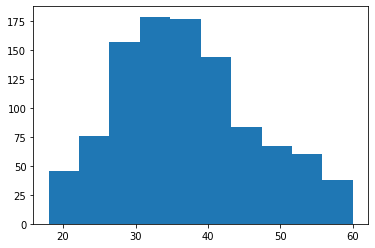

In [66]:
# Plot a histogram of Age and find the range in which most people are there.
plt.hist(df.Age)

Most people are in 30 to 40

(array([15.,  9., 22.,  7., 17., 52., 36., 75., 46., 45., 83., 51., 99.,
        41., 37., 59., 29., 56., 21., 27., 36., 12., 37., 18., 17., 27.,
        16., 13., 11., 14.]),
 array([18. , 19.4, 20.8, 22.2, 23.6, 25. , 26.4, 27.8, 29.2, 30.6, 32. ,
        33.4, 34.8, 36.2, 37.6, 39. , 40.4, 41.8, 43.2, 44.6, 46. , 47.4,
        48.8, 50.2, 51.6, 53. , 54.4, 55.8, 57.2, 58.6, 60. ]),
 <a list of 30 Patch objects>)

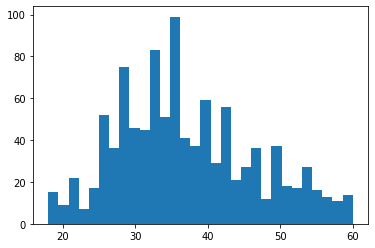

In [67]:
# Modify the histogram of Age by adding 30 bins.
plt.hist(df.Age, bins = 30)

Text(0.5, 0, 'Age')

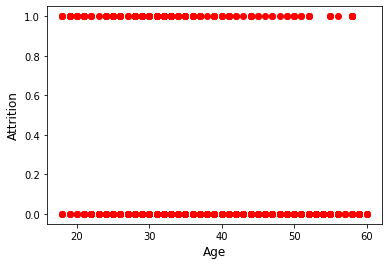

In [68]:
# Draw a scatter plot between Age and Attrition
plt.scatter(df.Age, df.Attrition, c='red')
plt.ylabel('Attrition', fontsize=12)
plt.xlabel('Age', fontsize=12)

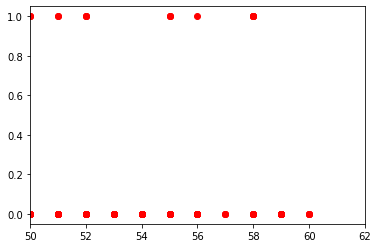

In [69]:
# Find out whether people more than 50 years are more likely to leave the company. (Attrition = 1 means people have left the company).
plt.scatter(df.Age, df.Attrition, c='red')
plt.xlim(50,62) 
plt.show()

In [70]:
age_counts = df.Age.value_counts()
print(age_counts)

35    52
34    51
36    47
30    46
31    45
29    43
32    42
37    41
33    41
38    37
27    36
40    35
42    33
28    32
26    30
41    29
45    27
39    24
50    24
43    23
25    22
46    22
44    21
51    18
24    17
52    17
55    16
53    14
47    14
49    13
54    13
48    12
22    12
58    11
56    10
59    10
21    10
19     9
20     9
23     7
18     6
60     4
57     3
Name: Age, dtype: int64


### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

0    856
1    172
Name: Attrition, dtype: int64


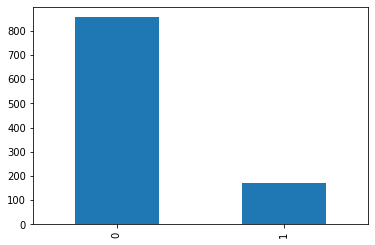

In [71]:
# Get a series of counts of values of Attrition
Attrition_counts = df.Attrition.value_counts()
print(Attrition_counts)
side=[0,1]
s = pd.Series(Attrition_counts,side)

# Draw a countplot for Attrition 
s.plot(kind = 'bar')

plt.show()

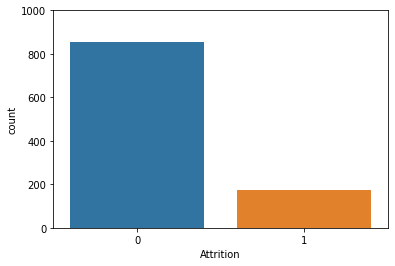

In [72]:
sns.countplot(x='Attrition',data=df)  # Solution
plt.ylim(0,1000)
plt.show()

### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

Text(0, 0.5, 'Number of Attrition')

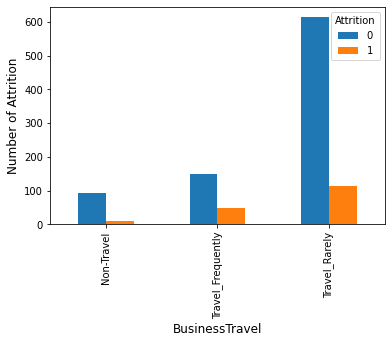

In [73]:
# Draw a cross tabulation of Attrition and BusinessTravel as bar charts.
# You may use crosstab of pandas for this 
pd.crosstab(df.BusinessTravel,df.Attrition).plot(kind='bar')  # Tutorial
plt.xlabel('BusinessTravel', fontsize=12)
plt.ylabel('Number of Attrition', fontsize=12)

Travel_Rarely of BusinessTravel has highest number of people.

### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

Text(0.5, 1.0, 'Attrition')

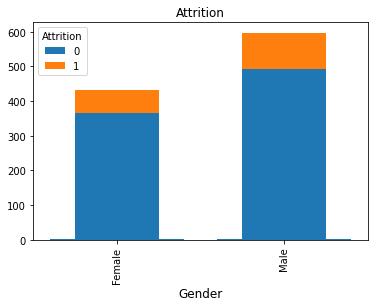

In [74]:
# Draw a stacked bar chart between Attrition and Gender 
table=pd.crosstab(df.Gender,df.Attrition)
table.plot(kind='bar',stacked=True) # Tutorial
plt.bar(df.Gender,df.Attrition)
plt.xlabel('Gender', fontsize=12)
plt.title('Attrition', fontsize=12)

### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

(array([ 65.,  24.,  32., 108.,  87.,  54., 140., 133.,  19.,  61.,  17.,
         21.,  53.,  20.,  15.,  47.,  20.,  16.,  21.,  13.,   2.,  17.,
          6.,   9.,  14.,   3.,   1.,   7.,   1.,   2.]),
 array([ 0.        ,  1.33333333,  2.66666667,  4.        ,  5.33333333,
         6.66666667,  8.        ,  9.33333333, 10.66666667, 12.        ,
        13.33333333, 14.66666667, 16.        , 17.33333333, 18.66666667,
        20.        , 21.33333333, 22.66666667, 24.        , 25.33333333,
        26.66666667, 28.        , 29.33333333, 30.66666667, 32.        ,
        33.33333333, 34.66666667, 36.        , 37.33333333, 38.66666667,
        40.        ]),
 <a list of 30 Patch objects>)

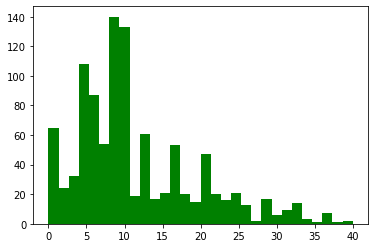

In [75]:
# Draw a histogram of TotalWorkingYears with 30 bins
plt.hist(df.TotalWorkingYears , bins = 30, color='green', orientation='vertical')

(array([156.,  84.,  93., 202.,  57.,  62., 121.,  78.,  23.,  24.,  10.,
         12.,  16.,  11.,   9.,  31.,   9.,   0.,  10.,   3.,   2.,   2.,
          0.,   3.,   6.,   1.,   0.,   2.,   0.,   1.]),
 array([ 0.        ,  1.33333333,  2.66666667,  4.        ,  5.33333333,
         6.66666667,  8.        ,  9.33333333, 10.66666667, 12.        ,
        13.33333333, 14.66666667, 16.        , 17.33333333, 18.66666667,
        20.        , 21.33333333, 22.66666667, 24.        , 25.33333333,
        26.66666667, 28.        , 29.33333333, 30.66666667, 32.        ,
        33.33333333, 34.66666667, 36.        , 37.33333333, 38.66666667,
        40.        ]),
 <a list of 30 Patch objects>)

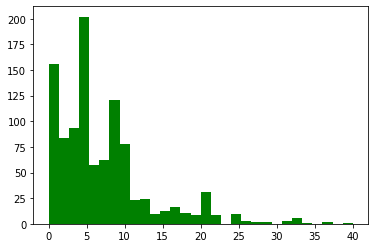

In [76]:
# Draw a histogram of YearsAtCompany
plt.hist(df.YearsAtCompany, bins = 30, color='green', orientation='vertical')

### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


[Text(0, 0, 'Sales'),
 Text(0, 0, 'Research & Development'),
 Text(0, 0, 'Human Resources')]

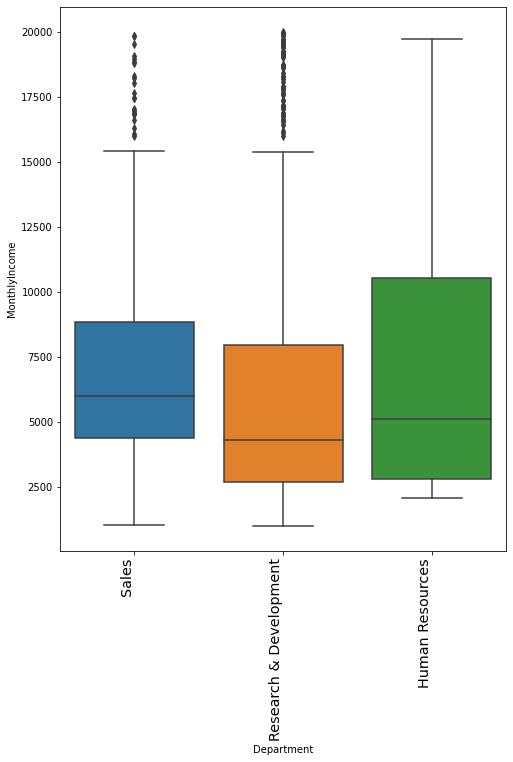

In [77]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 
plt.figure(figsize=(8,10))

chart = sns.boxplot(df['Department'], df['MonthlyIncome'], data=df)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)


Sales and Research & Development has outliers

### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

Sales Executive              223
Research Scientist           209
Laboratory Technician        183
Manufacturing Director       105
Healthcare Representative     85
Manager                       79
Research Director             59
Sales Representative          57
Human Resources               28
Name: JobRole, dtype: int64


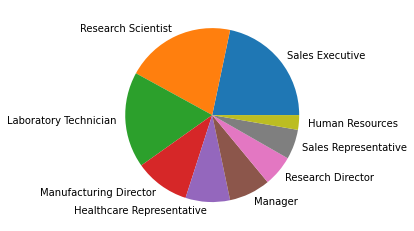

In [78]:
JobRole_counts = df.JobRole.value_counts()
print(JobRole_counts)
# plt.pie(JobRole_counts)
# plt.pie(JobRole_counts, labels=JobRole_counts)
plt.pie(JobRole_counts, labels=JobRole_counts.index.tolist())
plt.show()

In [79]:
!git clone https://github.com/sidparab/SHALA2020_New.git

Cloning into 'SHALA2020_New'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 46 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (46/46), done.
